<a href="https://colab.research.google.com/github/9-coding/Computer_Vision/blob/main/Image_Blending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
file_path = '/content/gdrive/MyDrive/Colab Notebooks/Computer_Vision/Lab02'

(512, 512, 3)
(512, 512, 3)


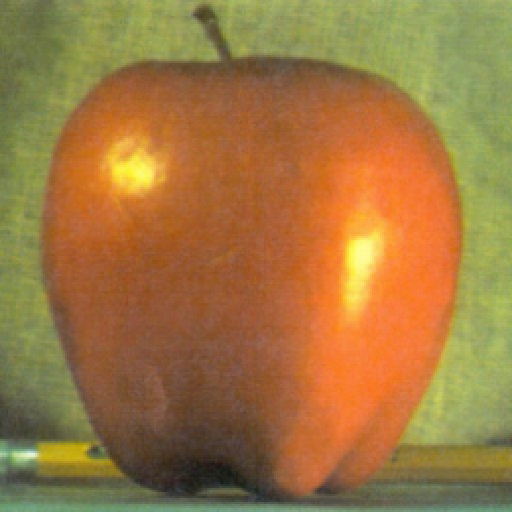

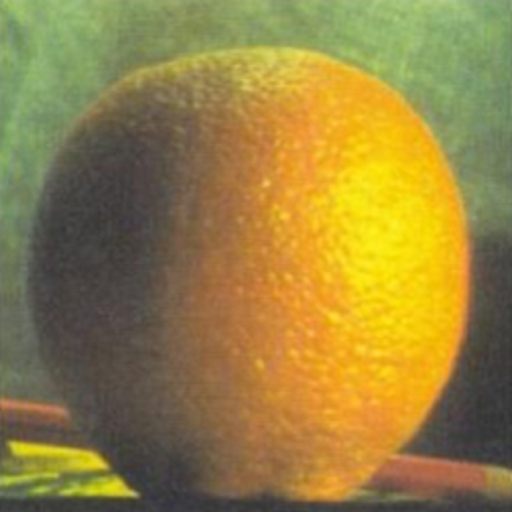

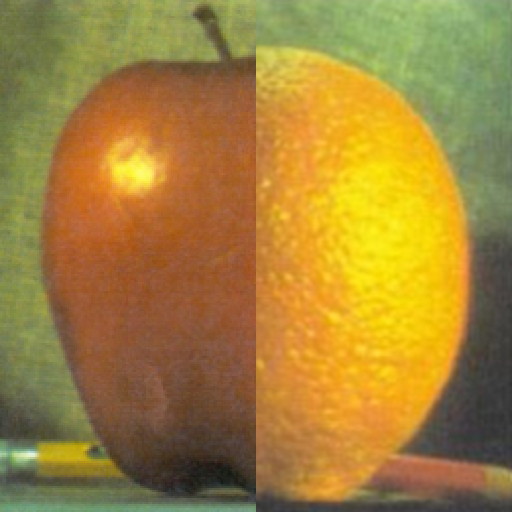

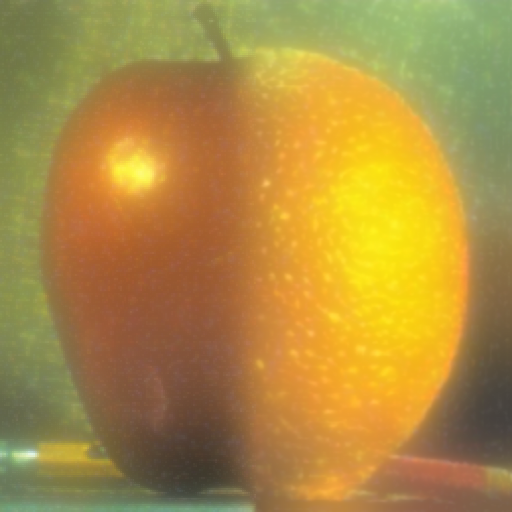

In [ ]:
import cv2
import sys
import numpy as np
from google.colab.patches import cv2_imshow

apple = cv2.imread(file_path + '/image_set/apple.png')
orange = cv2.imread(file_path + '/image_set/orange.png')

print(apple.shape)
print(orange.shape)
apple_orange = np.hstack((apple[:, :256], orange[:,256:]))

# generate Gaussian pyramid for apple
apple_copy = apple.copy()
gp_apple = [apple_copy]
for i in range(6):
  apple_copy = cv2.pyrDown(apple_copy)
  gp_apple.append(apple_copy)

# generate Gaussian pyramid for orange
orange_copy = orange.copy()
gp_orange = [orange_copy]
for i in range(6):
  orange_copy = cv2.pyrDown(orange_copy)
  gp_orange.append(orange_copy)

# generate Laplacian Pyramid for apple
apple_copy = gp_apple[5]
lp_apple = [apple_copy]
for i in range(5,0,-1):
  gaussian_expanded = cv2.pyrUp(gp_apple[i])
  laplacian = cv2.subtract(gp_apple[i-1], gaussian_expanded)
  lp_apple.append(laplacian)

# generate Laplacian Pyramid for orange
orange_copy = gp_orange[5]
lp_orange = [orange_copy]
for i in range(5,0,-1):
  gaussian_expanded = cv2.pyrUp(gp_orange[i])
  laplacian = cv2.subtract(gp_orange[i-1], gaussian_expanded)
  lp_orange.append(laplacian)

# Now add left and right halves of images in each level
apple_orange_pyramid = []
n = 0
for apple_lap, orange_lap in zip(lp_apple, lp_orange):
  n+= 1
  cols, rows, ch = apple_lap.shape
  laplacian = np.hstack((apple_lap[:, 0:int(cols/2)], orange_lap[:, int(cols/2):]))
  apple_orange_pyramid.append(laplacian)

# now reconstruct
apple_orange_reconstruct = apple_orange_pyramid[0]
for i in range(1,6):
  apple_orange_reconstruct = cv2.pyrUp(apple_orange_reconstruct)
  apple_orange_reconstruct = cv2.add(apple_orange_pyramid[i], apple_orange_reconstruct)

cv2_imshow(apple)
cv2_imshow(orange)
cv2_imshow(apple_orange)
cv2_imshow(apple_orange_reconstruct)

cv2.waitKey()
cv2.destroyAllWindows()